### 고양이 수염 스티커 만들기

#### 1.사진 준비하기(불러오기)

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

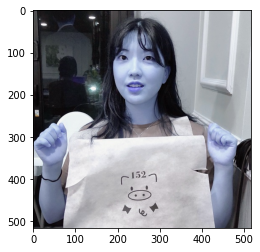

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/jieun.png'
img_bgr = cv2.imread(my_image_path)    #OpenCV로 이미지 불러오기
img_show = img_bgr.copy()      #출력용 이미지 따로 보관한다
plt.imshow(img_bgr)
plt.show()

opencv에서는 RBG가아닌 BGR의 채널을 사용해서 사진이 푸른색을 띈다.
따라서 색보정을 해준다.

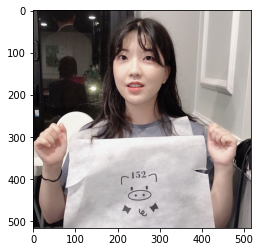

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

#### 2.얼굴 검출하기

In [4]:
detector_hog = dlib.get_frontal_face_detector() #detector 선언하기

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환한다.

rectangles[[(182, 82) (311, 211)]]


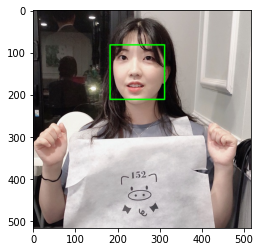

In [6]:
print(dlib_rects)   # 찾은 얼굴 영역 박스 리스트

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 3.얼굴 랜드마크

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) #저장된 랜드마크 모델 불러오기

In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


랜드마크를 출력해보자

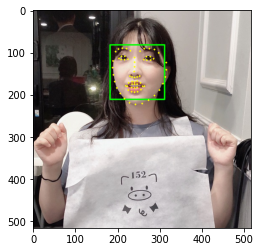

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 4.스티커 적용하기

좌표 확인

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33])
    x = landmark[33][0] #수염의 중앙 x값
    y = landmark[33][1] #수염의 중앙 y값
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(240, 159)
(x,y) : (240,159)
(w,h) : (130,130)


스티커 이미지 불러보기

(130, 130, 3)


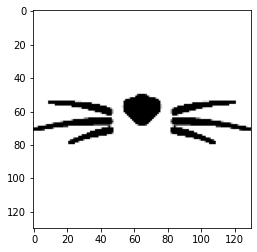

In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/moust.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker_rgb)
plt.show
print (img_sticker.shape)

스티커 이미지 좌표 설정하기

In [12]:
refined_x = x - w // 2  # left
refined_y = y - h // 2 # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (175,94)


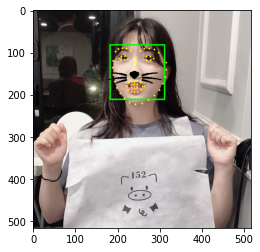

In [13]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

#### 5.최종 출력하기

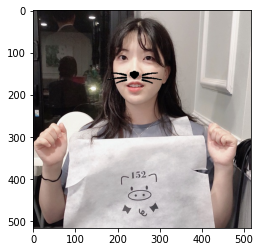

In [14]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 회고

스티커 이미지 좌표를 설정하는 부분에서 헤맸는데 다행히 성공했다.
노드 실습때는 왕관을 머리에 붙이는(?) 느낌이었는데, 스티커가 들어갈 부분의 픽셀을
입히는 과정이라는걸 이해하지 못했다가. 프로젝트를 통해서 조~금 알게되었다..
과제를 하면서 노드를 무한반복해서 보느라 처음 볼 때 보다 조금 이해도가 생겼지만,
노드를 보면서 따라하는게 아니라 백지상태에서는 못할 것 같다ㅠㅠ..